## Data collection
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, I used yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. 

# 1Change of the stock price during 2022 - 2023

In [6]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.5 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,59967700,AMAZON
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400,AMAZON
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100,AMAZON
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000,AMAZON
2023-02-24,93.529999,94.139999,92.320000,93.500000,93.500000,57053800,AMAZON
2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300,AMAZON
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300,AMAZON
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,AMAZON
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55574800,AMAZON


## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics of the dataset. Descriptive statistics is the method to summarize the measures of central tendency, dispersion, and shape of a dataset’s distribution. The null values were excluded from the analysis - Nan.

In [8]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,108.387245,109.960609,106.935747,108.434131,108.434131,2.835841e+07
std,14.389563,14.460696,14.191628,14.337725,14.337725,1.077570e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,97.194998,99.036751,95.352497,97.007500,97.007500,2.171485e+07
50%,107.637253,109.269997,106.362499,108.125000,108.125000,2.594840e+07
75%,116.343874,118.237497,115.068878,116.812498,116.812498,3.208950e+07
max,143.399506,144.162506,142.483994,143.642502,143.642502,9.779860e+07


In [9]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,150.378433,152.479921,148.436449,150.539960,150.017183,8.369614e+07
std,12.044125,11.963036,12.062166,12.046655,11.872221,2.368998e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.120003,143.987495,139.974998,142.472496,141.981434,6.800405e+07
50%,148.924995,151.014999,147.264999,149.424995,148.966270,7.847850e+07
75%,159.009995,160.549995,155.485004,157.492500,156.757717,9.305808e+07
max,178.550003,179.610001,176.699997,178.960007,177.882446,1.826020e+08


We have only 255 records in one year because weekends are not included in the data.

In [10]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,259.859405,263.109285,256.454087,259.860674,258.309425,2.970922e+07
std,21.613418,21.501181,21.244832,21.505296,20.882542,9.789685e+06
min,217.550003,220.410004,213.429993,214.250000,213.114120,9.200800e+06
25%,243.200005,245.307499,240.342499,242.402496,241.442757,2.289520e+07
50%,257.475006,260.384995,253.364998,256.744995,255.108627,2.810065e+07
75%,276.110001,278.899986,270.894989,275.062508,272.880524,3.352332e+07
max,313.910004,315.950012,311.579987,315.410004,312.345795,8.610200e+07


In [11]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,116.620167,118.607209,114.449371,116.527141,116.527141,7.474836e+07
std,22.164940,22.332020,21.887441,22.082329,22.082329,3.051204e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,97.740002,98.872499,95.965000,97.452497,97.452497,5.521640e+07
50%,113.565002,115.695000,111.799999,113.715000,113.715000,6.699435e+07
75%,131.069996,132.475006,129.202503,130.052505,130.052505,8.484168e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [12]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-03-03 to 2023-03-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

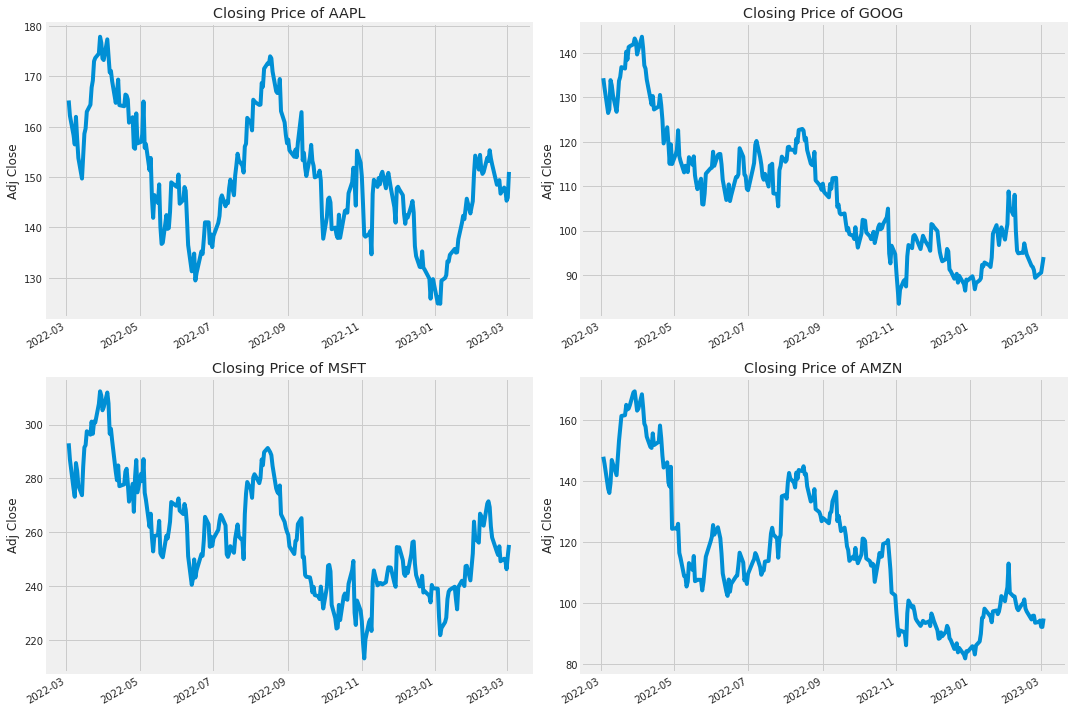

In [13]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

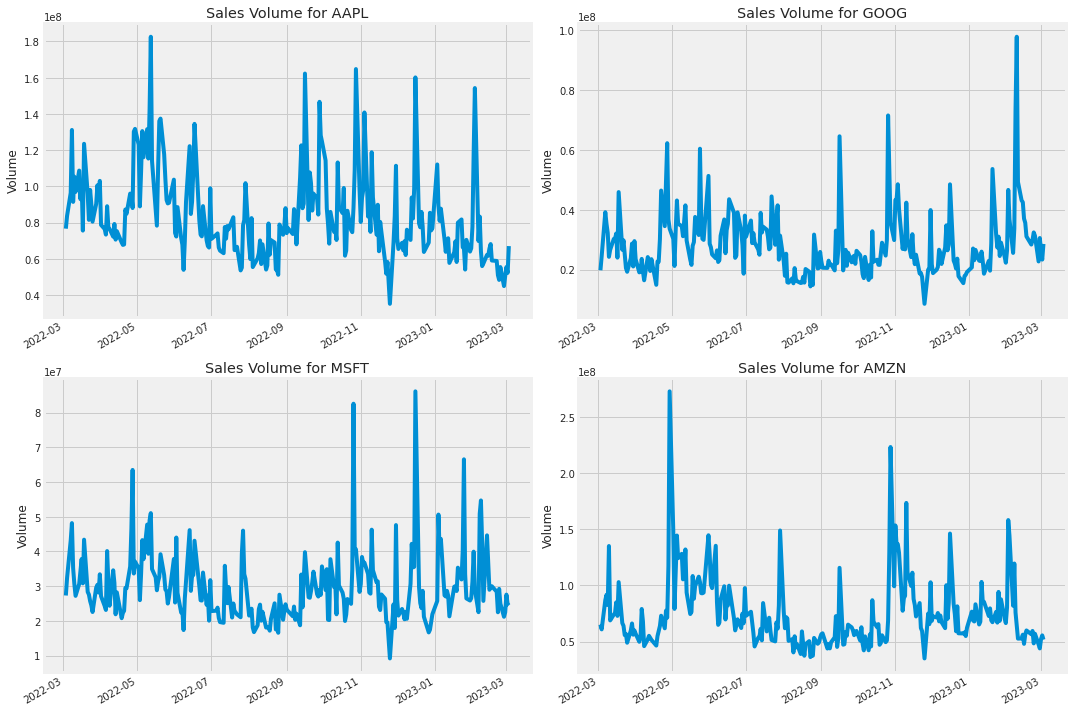

In [14]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Moving Average Analysis of Stock price

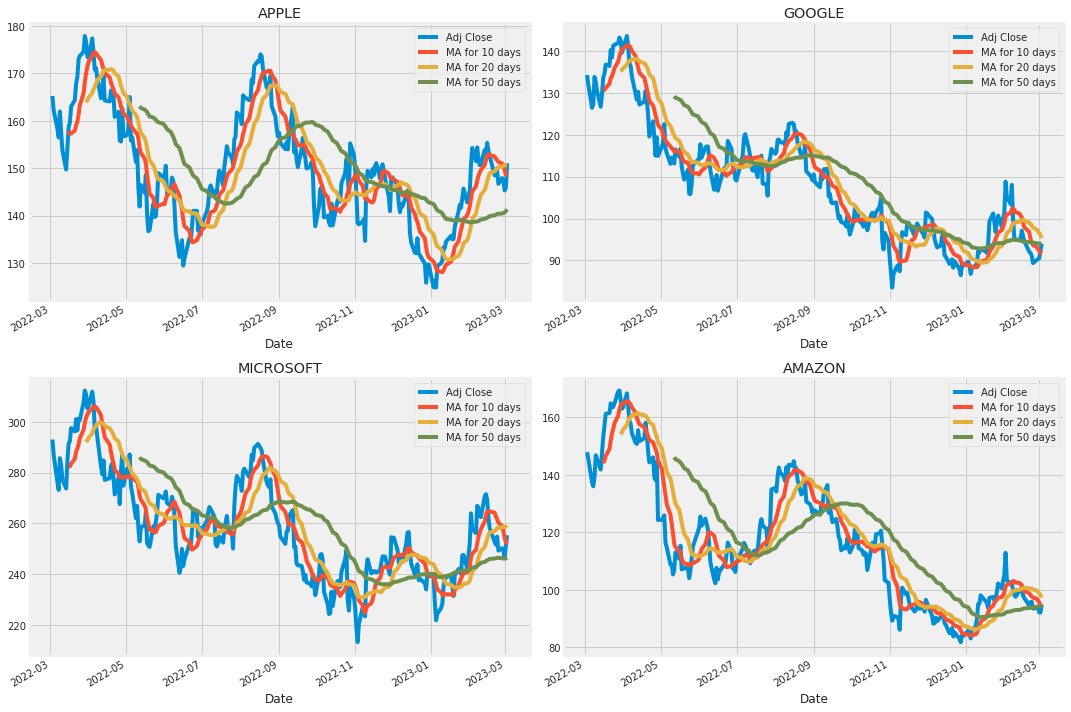

In [15]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# Estimation of daily return of the stock on average**

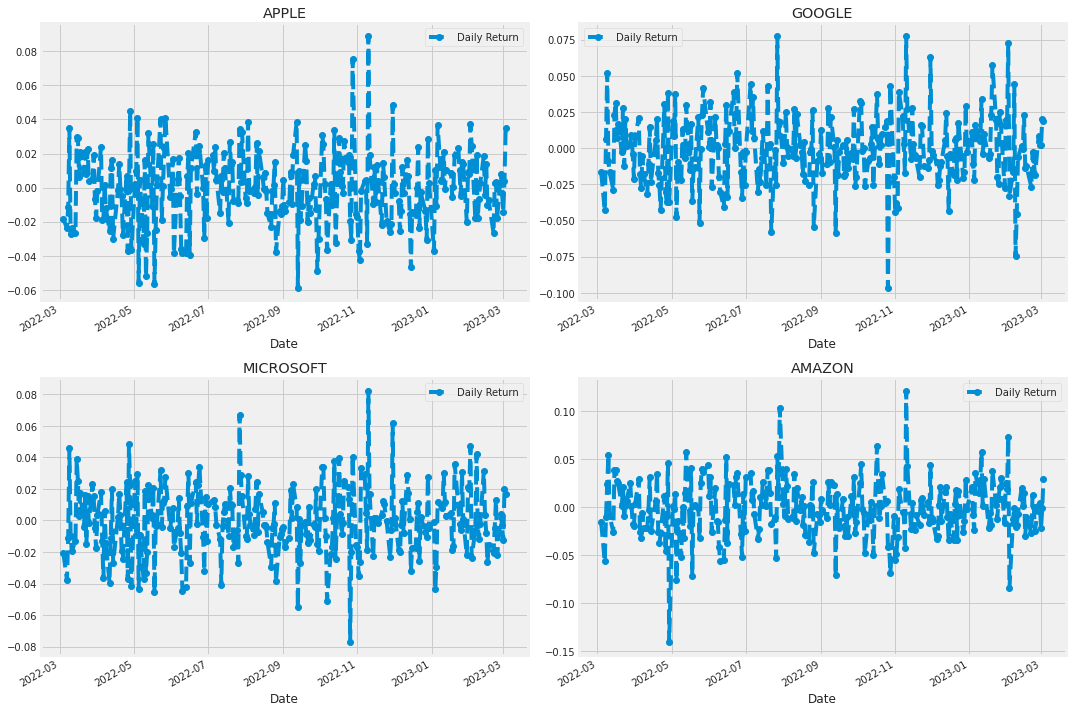

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-03,NaN,NaN,NaN,NaN
2022-03-04,-0.018408,-0.015264,-0.016276,-0.020479
2022-03-07,-0.023718,-0.056220,-0.042820,-0.037777
2022-03-08,-0.011676,-0.010465,0.006437,-0.010971
2022-03-09,0.034998,0.024001,0.051757,0.045858


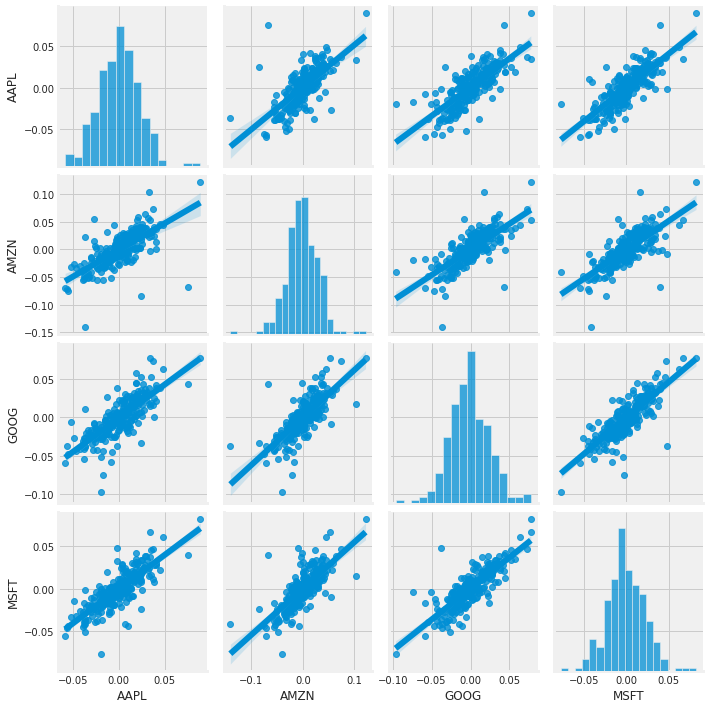

In [18]:


sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

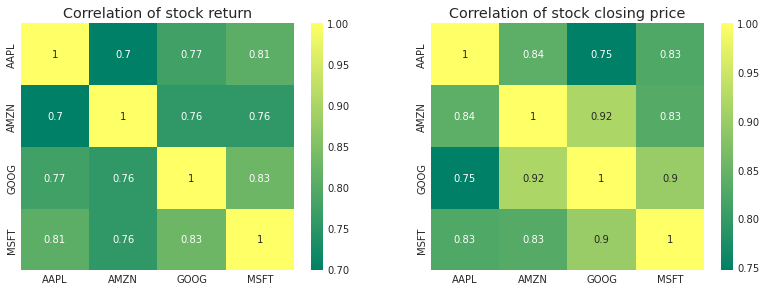

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

The above visualisation shows numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. 

# Predicting the closing price stock price of APPLE inc:

In [20]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500193,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819362,394024400
...,...,...,...,...,...,...
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000


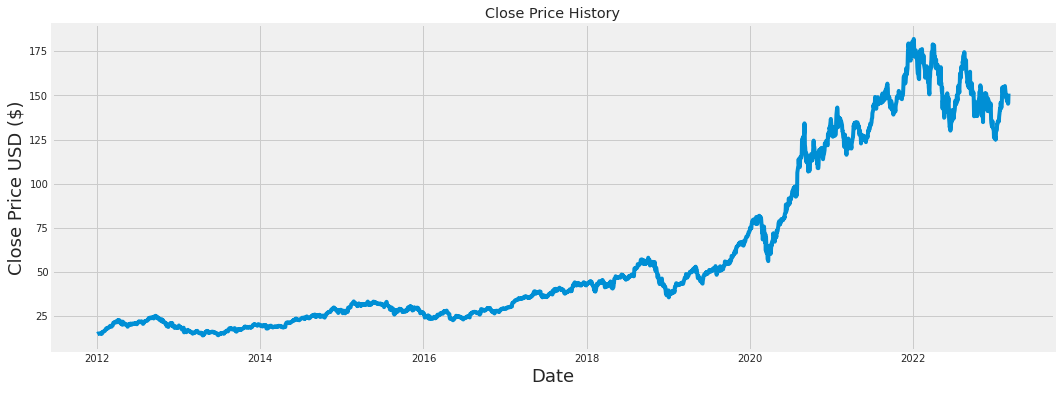

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2670

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.78162887],
       [0.78519901],
       [0.81566383]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [25]:


from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=5)

Epoch 1/5
131/131 [==============================] - 27s 146ms/step - loss: 0.6344
Epoch 2/5
131/131 [==============================] - 23s 176ms/step - loss: 0.6344
Epoch 3/5
131/131 [==============================] - 20s 152ms/step - loss: 0.6344
Epoch 4/5
131/131 [==============================] - 20s 154ms/step - loss: 0.6344
Epoch 5/5
131/131 [==============================] - 23s 175ms/step - loss: 0.6344


In [26]:


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


5/5 [==============================] - 2s 50ms/step


36.4637384505189

<ipython-input-27-68fccc0920af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


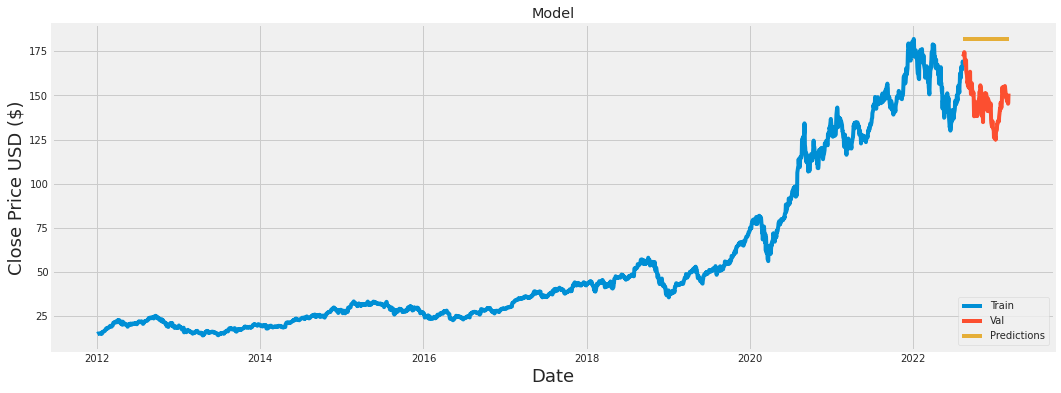

In [27]:


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-12,172.100006,182.009995
2022-08-15,173.190002,182.009995
2022-08-16,173.029999,182.009995
2022-08-17,174.550003,182.009995
2022-08-18,174.149994,182.009995
...,...,...
2023-02-27,147.919998,182.009995
2023-02-28,147.410004,182.009995
2023-03-01,145.309998,182.009995


In [30]:
from keras.layers import Dense, LSTM , Flatten

# Define the model
model = Sequential()

# Add the first layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add the remaining 3 layers
for i in range(3):
    model.add(LSTM(units=64, return_sequences=True))
model.add(Flatten())
# Add the final output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Make predictions
predictions = model.predict(x_test)



Epoch 1/5
82/82 [==============================] - 23s 161ms/step - loss: 0.0070
Epoch 2/5
82/82 [==============================] - 13s 156ms/step - loss: 0.0014
Epoch 3/5
82/82 [==============================] - 13s 159ms/step - loss: 0.0014
Epoch 4/5
82/82 [==============================] - 13s 159ms/step - loss: 0.0013
Epoch 5/5
5/5 [==============================] - 2s 39ms/step


In [31]:
# Evaluate the model on the test data
loss = model.evaluate(x_test, y_test)

# Make predictions on the test data
predictions = model.predict(x_test)

# Calculate the root mean squared error (RMSE) of the predictions
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Print the evaluation metrics
print("Test loss:", loss)
print("Test RMSE:", rmse)


5/5 [==============================] - 0s 38ms/step
Test loss: 21507.984375
Test RMSE: 146.65600461293369


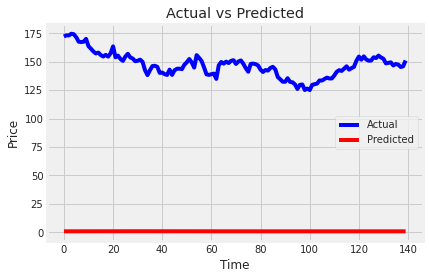

In [32]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(y_test, color='blue', label='Actual')
plt.plot(predictions, color='red', label='Predicted')

# Set the plot title and axis labels
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-12,172.100006,182.009995
2022-08-15,173.190002,182.009995
2022-08-16,173.029999,182.009995
2022-08-17,174.550003,182.009995
2022-08-18,174.149994,182.009995
...,...,...
2023-02-27,147.919998,182.009995
2023-02-28,147.410004,182.009995
2023-03-01,145.309998,182.009995


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

x_train = np.random.rand(1000, 60, 1)
y_train = np.random.rand(1000, 1)

# Reshape input data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
for i in range(14):
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=5)


Epoch 1/5
50/50 [==============================] - 105s 1s/step - loss: 0.1203
Epoch 2/5
50/50 [==============================] - 72s 1s/step - loss: 0.0874
Epoch 3/5
50/50 [==============================] - 74s 1s/step - loss: 0.0876
Epoch 4/5
50/50 [==============================] - 74s 1s/step - loss: 0.0860
Epoch 5/5
50/50 [==============================] - 73s 1s/step - loss: 0.0854


In [35]:
# Generate test data
x_test = np.random.rand(100, 60, 1)

# Reshape test data to fit the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on test data
predictions = model.predict(x_test)

# Print the predictions
print(predictions)


4/4 [==============================] - 10s 378ms/step
[[0.53892916]
 [0.5389368 ]
 [0.5389452 ]
 [0.5389401 ]
 [0.53894234]
 [0.5389356 ]
 [0.53893924]
 [0.53892964]
 [0.53894377]
 [0.5389344 ]
 [0.5389431 ]
 [0.5389337 ]
 [0.5389396 ]
 [0.5389318 ]
 [0.5389373 ]
 [0.5389345 ]
 [0.5389325 ]
 [0.5389362 ]
 [0.5389413 ]
 [0.5389408 ]
 [0.53893566]
 [0.5389318 ]
 [0.5389361 ]
 [0.53893757]
 [0.5389439 ]
 [0.5389381 ]
 [0.53894615]
 [0.5389455 ]
 [0.5389384 ]
 [0.5389372 ]
 [0.5389348 ]
 [0.5389337 ]
 [0.53893346]
 [0.5389383 ]
 [0.5389388 ]
 [0.5389359 ]
 [0.53894484]
 [0.53894454]
 [0.53894436]
 [0.5389454 ]
 [0.53894484]
 [0.5389405 ]
 [0.53894764]
 [0.5389414 ]
 [0.5389282 ]
 [0.5389385 ]
 [0.5389295 ]
 [0.53893685]
 [0.5389404 ]
 [0.5389378 ]
 [0.53894264]
 [0.53894246]
 [0.5389361 ]
 [0.53894323]
 [0.5389386 ]
 [0.538935  ]
 [0.5389448 ]
 [0.5389447 ]
 [0.5389359 ]
 [0.5389498 ]
 [0.53894067]
 [0.53894013]
 [0.5389302 ]
 [0.5389381 ]
 [0.53894126]
 [0.53893393]
 [0.53894526]
 [0.5389

4/4 [==============================] - 2s 374ms/step


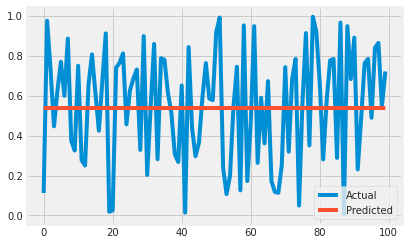

In [36]:
import matplotlib.pyplot as plt

# Generate test data
x_test = np.random.rand(100, 60, 1)
y_test = np.random.rand(100, 1)

# Reshape test data to fit the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on test data
predictions = model.predict(x_test)

# Plot predicted values against actual values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
